# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [10]:
# Import all libraries needed here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


## Read your dataset

In [2]:
# Read dataset
df = pd.read_csv('C:\\Users\\Patron\\Downloads\\cancer patient data sets.csv')
print(df.head())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [6]:
# Convert target variable from categorical to integer code
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])
print(df['Level'])



0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64


## Check for missing values

In [7]:
# Check for missing values
mv = df.isnull().sum()
print(mv)

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


## Check for outliers:

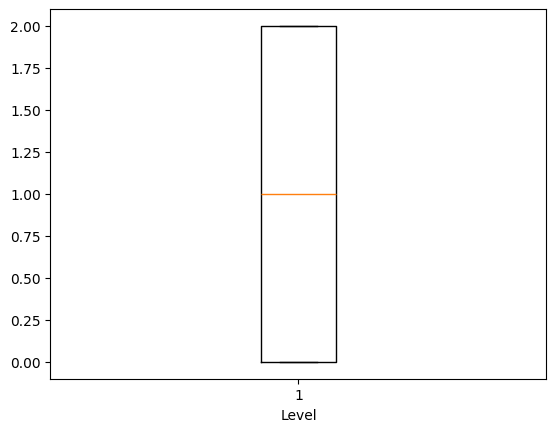

Good job no outliars detected


In [8]:
#Create the bixplot
plt.boxplot(df['Level'])
plt.xlabel('Level')
plt.show()

# get the quartiles and iqr
Q1 = df['Level'].quantile(0.25)
Q3 = df['Level'].quantile(0.75)
IQR = Q3 - Q1

#Establish cuttoffs
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

# get the outliars
outliers = df[(df['Level'] < low) | (df['Level'] > up)]
if outliers.empty:
   print("Good job no outliars detected")
else:
   
    print(outliers)

    # Remove outliers from the dataset
    cleanHeart = df.drop(outliers.index)



## Data Scaling:

In [64]:
#scaleMe = ['Level']

#Dont skip this step
#scaler = MinMaxScaler()


# Dont skip this and create a copy so we dont mess up original data
#scaled = df.copy()  
#Scale the data
##scaled[scaleMe] = scaler.fit_transform(scaled[scaleMe])

#print(scaled) 

# Exclude non-numeric columns and columns that are not relevant for modeling
numeric_data = df.drop(['Patient Id'], axis=1)

# Scale only the numeric columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)


## Extract features X and target y from the dataset:

In [66]:
X = data_scaled
y = df['Level']

print(y)


0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64


## Split X and y into X_train, X_test, y_train, y_test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_test)


521    2
737    2
740    2
660    0
411    2
      ..
408    2
332    0
208    0
613    1
78     2
Name: Level, Length: 200, dtype: int64


## KNN:
Use KNN and find the best K-neighbor value:

In [69]:
# KNN
k_values = [3, 5, 7, 9, 11]  # Define the values of k to test

for k in range(1, 59):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('KNN with k =', k, 'has Accuracy:', accuracy)


KNN with k = 1 has Accuracy: 1.0
KNN with k = 2 has Accuracy: 1.0
KNN with k = 3 has Accuracy: 1.0
KNN with k = 4 has Accuracy: 1.0
KNN with k = 5 has Accuracy: 1.0
KNN with k = 6 has Accuracy: 1.0
KNN with k = 7 has Accuracy: 1.0
KNN with k = 8 has Accuracy: 1.0
KNN with k = 9 has Accuracy: 1.0
KNN with k = 10 has Accuracy: 1.0
KNN with k = 11 has Accuracy: 1.0
KNN with k = 12 has Accuracy: 1.0
KNN with k = 13 has Accuracy: 0.98
KNN with k = 14 has Accuracy: 0.98
KNN with k = 15 has Accuracy: 0.98
KNN with k = 16 has Accuracy: 0.98
KNN with k = 17 has Accuracy: 0.98
KNN with k = 18 has Accuracy: 0.975
KNN with k = 19 has Accuracy: 0.975
KNN with k = 20 has Accuracy: 0.975
KNN with k = 21 has Accuracy: 0.975
KNN with k = 22 has Accuracy: 0.975
KNN with k = 23 has Accuracy: 0.975
KNN with k = 24 has Accuracy: 0.975
KNN with k = 25 has Accuracy: 0.975
KNN with k = 26 has Accuracy: 0.975
KNN with k = 27 has Accuracy: 0.975
KNN with k = 28 has Accuracy: 0.975
KNN with k = 29 has Accuracy: 

## Decision Tree
Use decision tree and find the best max depth value:

In [70]:
# Decision Tree
max_depth_values = [3, 5, 7, 9]
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree with max depth={depth} - Accuracy: {accuracy}')


Decision Tree with max depth=3 - Accuracy: 1.0
Decision Tree with max depth=5 - Accuracy: 1.0
Decision Tree with max depth=7 - Accuracy: 1.0
Decision Tree with max depth=9 - Accuracy: 1.0


## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [71]:
# Random Forest
n_estimators_values = [50, 100, 150]
max_depth_values = [3, 5, 7]
for n_estimators in n_estimators_values:
    for depth in max_depth_values:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Random Forest with n_estimators={n_estimators} and max depth={depth} - Accuracy: {accuracy}')


Random Forest with n_estimators=50 and max depth=3 - Accuracy: 1.0
Random Forest with n_estimators=50 and max depth=5 - Accuracy: 1.0
Random Forest with n_estimators=50 and max depth=7 - Accuracy: 1.0
Random Forest with n_estimators=100 and max depth=3 - Accuracy: 1.0
Random Forest with n_estimators=100 and max depth=5 - Accuracy: 1.0
Random Forest with n_estimators=100 and max depth=7 - Accuracy: 1.0
Random Forest with n_estimators=150 and max depth=3 - Accuracy: 1.0
Random Forest with n_estimators=150 and max depth=5 - Accuracy: 1.0
Random Forest with n_estimators=150 and max depth=7 - Accuracy: 1.0


## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [72]:
# AdaBoost
n_estimators_values = [50, 100, 150]
for n_estimators in n_estimators_values:
    ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=0.01)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'AdaBoost with n_estimators={n_estimators} - Accuracy: {accuracy}')


c:\Users\Patron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Patron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with n_estimators=50 - Accuracy: 1.0
AdaBoost with n_estimators=100 - Accuracy: 1.0


c:\Users\Patron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with n_estimators=150 - Accuracy: 1.0


## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost



In [73]:
# XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost - Accuracy: {accuracy}')


XGBoost - Accuracy: 1.0
